<a href="https://colab.research.google.com/github/amder111/Union_find/blob/master/Union_Find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from random import randint
import matplotlib.pyplot as plt
from pandas import DataFrame

In [0]:
class UFO_Array:
    def __init__(self, num_sets):
        self.array = [i for i in range(num_sets)]
    def find_set(self, v):
        return self.array[v], 1
    def union(self, x, y):
        y_set = self.array[y]
        x_set = self.array[x]
        comp = 0
        sets = 0
        set_seen = set()
        for index, value in enumerate(self.array):
            comp += 2
            if (value == y_set):
                self.array[index] = x_set
            if (value not in set_seen):
                sets += 1
                set_seen.add(value)
        return sets, comp

In [0]:
class LL_Node:
    def __init__(self, val):
        self.val = val
        self.head_ptr = None
        self.rear_ptr = None
        self.next_ptr = None
class LL:
    def __init__(self, val):
        node = LL_Node(val)
        self.head_ptr = node
        self.rear_ptr = node
        self.rank = 1
        node.head_ptr = self.head_ptr
        node.rear_ptr = self.rear_ptr

In [0]:
class UFO_LL:
    def __init__(self, num_sets):
        self.tracker = {}

        for i in range(num_sets):
            self.tracker[i] = LL(i)
    def find_set(self, val):
        return self.tracker[val].head_ptr.val, 1
    def union(self, x, y):
        sets = 0
        set_seen = set()
        s1 = self.tracker[x]
        s2 = self.tracker[y]
        if (s1.head_ptr.val != s2.head_ptr.val):
            if (s1.rank < s2.rank):
                ptr1 = s1.head_ptr
                ptr2 = s2.head_ptr
                s2.rank += s1.rank
            else:
                ptr1 = s2.head_ptr
                ptr2 = s1.head_ptr
                s1.rank += s2.rank
        while (ptr1):
            ptr2.rear_ptr.next_ptr = ptr1
            ptr2.rear_ptr = ptr2.rear_ptr.next_ptr
            ptr2.rear_ptr.head_ptr = ptr2.head_ptr
            ptr1 = ptr1.next_ptr
            if ((ptr1 and ptr2) and (ptr1.head_ptr.val == ptr2.head_ptr.val)):
                break
        for i in self.tracker:
            s, _ = self.find_set(i)
            if (s not in set_seen):
                sets += 1
                set_seen.add(s)
        return s, s1.rank + s2.rank

In [0]:
class Forest_Node:
    def __init__(self, parent, rank):
        self.parent = parent
        self.rank = rank
class UFO_Forest:
    def __init__(self, num_sets):
        self.subsets = {v: Forest_Node(v, 1) for v in range(num_sets)}
    def find_set(self, node):
        if (self.subsets[node].parent != node):
            self.subsets[node].parent, _ = self.find_set(self.subsets[node].parent)
        return self.subsets[node].parent, 1
    def union(self, u, v):
        if (self.subsets[u].rank > self.subsets[v].rank):
            self.subsets[v].parent = u
            return self.subsets[u], 1
        elif (self.subsets[v].rank > self.subsets[u].rank):
            self.subsets[u].parent = v
            return self.subsets[v], 2
        else:
            self.subsets[v].parent = u
            self.subsets[u].rank += 1
            return self.subsets[v], 3
def run_exp(limit, num_sets, UFO):
    ufo = UFO(num_sets)
    c = 0
    sets = num_sets
    for _ in range(limit):
        if (sets == 1):
            _, c_temp = ufo.find_set(randint(0, num_sets-1))
            c += c_temp

        else:
            r = randint(1, 100)
            if (r > 50):
                _, c_temp = ufo.find_set(randint(0, num_sets-1))
                c += c_temp
            else:
                a = randint(0, num_sets-1)
                b = randint(0, num_sets-1)
                while (a == b):
                    a = randint(0, num_sets-1)
                    b = randint(0, num_sets-1)
                sets, c_temp = ufo.union(a, b)
                c += c_temp
    return c

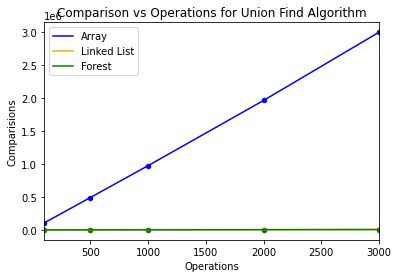

In [0]:
num_sets = 1000
operations = [100, 500, 1000, 2000, 3000]
comparisons_arr = []
comparisons_ll = []
comparisons_forest = []
for operation in operations:
    comparisons_arr.append(run_exp(operation, num_sets, UFO_Array))
    comparisons_ll.append(run_exp(operation, num_sets, UFO_LL))
    comparisons_forest.append(run_exp(operation, num_sets, UFO_Forest))
df = DataFrame({"Array": comparisons_arr, "Linked List": comparisons_ll, "Forest":
comparisons_forest, "Operations": operations})
ax = plt.gca()
df.plot(kind='line', x='Operations', y='Array', color='blue', ax=ax)
df.plot(kind='scatter', x='Operations', y='Array', color='blue', ax=ax)
df.plot(kind='line', x='Operations', y='Linked List', color='orange', ax=ax)
df.plot(kind='scatter', x='Operations', y='Linked List', color='orange', ax=ax)
df.plot(kind='line', x='Operations', y='Forest', color='green', ax=ax)
df.plot(kind='scatter', x='Operations', y='Forest', color='green', ax=ax)

plt.xlabel("Operations")
plt.ylabel("Comparisions")
plt.title("Comparison vs Operations for Union Find Algorithm")
plt.show()